In [217]:
import torch
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
import torch.nn.functional as F

In [266]:
#Iterations
PARTS = 1000
#If the loss change is smaller than that break the training loop (for checking if it converged)
CHANGE = 10**(-8)
#How much result is rounded
ROUNDED = 4
#Learning rate
LR = 1e-6

In [267]:
x = torch.linspace(-4, 4, PARTS)
y = x**3 + x**2 + x + 1

In [268]:
exp = torch.tensor([1,2,3])
x_new = x.unsqueeze(-1).pow(exp)

In [269]:
model = torch.nn.Sequential(
    torch.nn.Linear(len(exp),1),
    torch.nn.Flatten(0,1)
    )

In [270]:
loss_fn = torch.nn.MSELoss(reduction='sum')
STOP = False
LAST_LOSS = [1]
loss_history = []
while STOP == False:
  for t in range(PARTS):
    y_pred = model(x_new)
    loss = loss_fn(y_pred, y)
    loss_history.append(loss.item())
    if abs(loss - LAST_LOSS[0]) < CHANGE:
      STOP=True
      break
    else:
      LAST_LOSS[0] = loss
    if t %(PARTS/25) == 0:
      print(t, loss.item())
      if math.isnan(loss.item()):
        LR *= 10
        break
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
      for params in model.parameters():
        params -= LR * params.grad
linear = model[0]

0 615669.75
40 1231.3260498046875
80 1072.0731201171875
120 940.0486450195312
160 824.5159912109375
200 723.39697265625
240 634.8779907226562
280 557.375
320 489.50469970703125
360 430.0579833984375
400 377.9769592285156
440 332.33935546875
480 292.3380126953125
520 257.2679443359375
560 226.5127410888672
600 199.53419494628906
640 175.86082458496094
680 155.0814666748047
720 136.83546447753906
760 120.8089828491211
800 106.72618103027344
840 94.34674072265625
880 83.46005249023438
920 73.88150787353516
960 65.4506607055664
0 58.02588653564453
40 51.48361587524414
80 45.71649932861328
120 40.62942123413086
160 36.139495849609375
200 32.17448425292969
240 28.670757293701172
280 25.572481155395508
320 22.830812454223633
360 20.40304946899414
400 18.25152015686035
440 16.343326568603516
480 14.649892807006836
520 13.145383834838867
560 11.807826042175293
600 10.617632865905762
640 9.557677268981934
680 8.612561225891113
720 7.769437789916992
760 7.016220569610596
800 6.342857360839844
840

In [271]:
weights = []
for i in range(len(exp)):
  weights.append(round(linear.weight[:,i].item(), ROUNDED))

In [272]:
result = str(round(linear.bias.item(), ROUNDED))
for i in range(len(weights)):
  sign = " + " if weights[i] > 0 else " - "
  result += sign + str(abs(weights[i])) + f"x^{exp[i].item()}"
print(f"Result: {result}")

Result: 0.9994 + 1.0x^1 + 1.0001x^2 + 1.0x^3


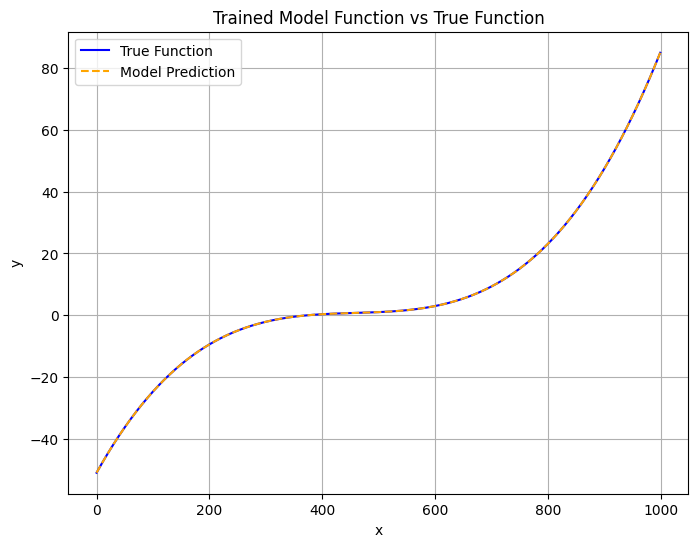

In [273]:
with torch.no_grad():
    y_pred = model(x_new)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(y, label="True Function", color="blue")
plt.plot(y_pred, label="Model Prediction", color="orange", linestyle="--")
plt.title("Trained Model Function vs True Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

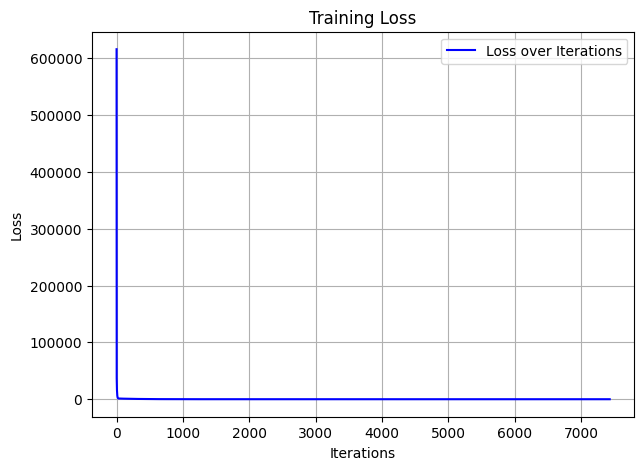

In [274]:
plt.figure(figsize=(7, 5))
plt.plot(loss_history, label="Loss over Iterations", color="blue")
plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()